In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
data = pd.read_csv("years-lived-with-disability-vs-health-expenditure-per-capita.csv",delimiter=',')

In [8]:
data = data[data.Year == 2011]
data = data.dropna()

In [9]:
x_obs = np.array(data.Health_expenditure_per_capita_PPP)
y_obs = np.array(data.Years_Lived_With_Disability)

In [209]:
def model(x,m,b):
    return m*x+b

In [210]:
def dist(x,y,m,b):
    A = -1
    B = 1/m
    C = -b/m
    return abs(A*x+B*y+C)/((A**2+B**2)**0.5)

def loglikelihood(x_obs, y_obs, m, b):
    ymodel = model(x_obs,m,b)
    gamm = ymodel*np.exp(-ymodel/y_obs)/(y_obs**2)
    return np.sum(np.log(gamm))

def logprior(m, b):
    p = -np.inf
    m_min = 0
    m_max = 1E-2
    b_min = 0
    b_max = 20
    if m < m_max and m >m_min and b >b_min and b<b_max:
        p = np.log(1/((b_max-b_min)*(m_max-m_min)))
    return p


In [211]:
N = 50000
lista_m = [1/8000.0]
lista_b = [10.0]
# logposterior = [loglikelihood(x_obs, y_obs, lista_m[0], lista_b[0]) + logprior(lista_m[0], lista_b[0])]
logposterior = [0]

sigma_delta_m = 1E-4
sigma_delta_b = 0.5

for i in range(1,N):
    propuesta_m  = lista_m[i-1] + np.random.normal()*sigma_delta_m
    propuesta_b  = lista_b[i-1] + np.random.normal()*sigma_delta_b

    logposterior_viejo = loglikelihood(x_obs, y_obs, lista_m[i-1], lista_b[i-1]) + logprior(lista_m[i-1], lista_b[i-1])
    logposterior_nuevo = loglikelihood(x_obs, y_obs, propuesta_m , propuesta_b ) + logprior(propuesta_m , propuesta_b )

    r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
    alpha = np.random.random()
    if(alpha<r):
        lista_m.append(propuesta_m)
        lista_b.append(propuesta_b)
        logposterior.append(logposterior_nuevo)
    else:
        lista_m.append(lista_m[i-1])
        lista_b.append(lista_b[i-1])
        logposterior.append(logposterior_viejo)
lista_m = np.array(lista_m)
lista_b = np.array(lista_b)
logposterior = np.array(logposterior)

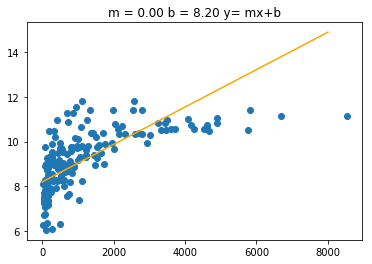

In [212]:
# yb,paramb = (np.histogram(lista_b,normed=True))
# paramb=paramb[1:]

# b = paramb[yb==max(yb)]

# ym,paramm = (np.histogram(lista_m,normed=True))
# paramm=paramm[1:]
# m = paramm[ym==max(ym)]

plt.scatter(data.Health_expenditure_per_capita_PPP,data.Years_Lived_With_Disability)
xs = np.linspace(0,8000,1000)
# ys = model(xs,m,b)
ys = model(xs,np.mean(lista_m),np.mean(lista_b))
plt.title("m = {:.2f} b = {:.2f} y= mx+b".format(np.mean(lista_m),np.mean(lista_b)))
plt.plot(xs,ys,c='orange')
# plt.ylim(4,12)
# plt.savefig("modelo1.pdf")
# plt.close()

(array([1.000e+00, 0.000e+00, 3.000e+00, 2.000e+00, 3.000e+00, 2.000e+00,
        4.000e+00, 9.000e+00, 8.000e+00, 2.200e+01, 2.300e+01, 3.500e+01,
        5.100e+01, 5.300e+01, 5.800e+01, 7.300e+01, 8.100e+01, 1.460e+02,
        1.110e+02, 1.570e+02, 1.640e+02, 2.450e+02, 2.710e+02, 2.920e+02,
        3.760e+02, 4.240e+02, 4.490e+02, 4.750e+02, 5.890e+02, 6.830e+02,
        7.290e+02, 8.820e+02, 8.440e+02, 9.960e+02, 1.062e+03, 1.189e+03,
        1.171e+03, 1.188e+03, 1.324e+03, 1.456e+03, 1.382e+03, 1.527e+03,
        1.532e+03, 1.587e+03, 1.512e+03, 1.569e+03, 1.645e+03, 1.517e+03,
        1.528e+03, 1.507e+03, 1.524e+03, 1.420e+03, 1.312e+03, 1.368e+03,
        1.199e+03, 1.205e+03, 1.154e+03, 1.026e+03, 1.045e+03, 9.110e+02,
        8.020e+02, 7.660e+02, 6.350e+02, 6.690e+02, 5.340e+02, 4.090e+02,
        4.570e+02, 3.570e+02, 3.560e+02, 2.810e+02, 2.590e+02, 2.040e+02,
        1.620e+02, 1.660e+02, 1.140e+02, 1.320e+02, 1.310e+02, 6.700e+01,
        4.300e+01, 6.600e+01, 4.900e+0

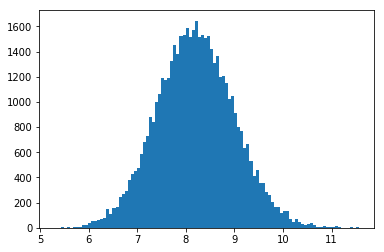

In [213]:
plt.hist(lista_b,bins=100)

In [10]:

def model2(x,a,b):
    return a*np.log(x) + b

def loglikelihood(x_obs, y_obs, sigma_y_obs, m, b):
    ymodel = model2(x_obs,m,b)
    gamm = ymodel*np.exp(-ymodel/y_obs)/(y_obs**2)
    return np.sum(np.log(gamm))

def logprior(m, b):
    p = -np.inf
    
    m_min = 0.1
    m_max = 2
    b_min = -4
    b_max = 12
    if m < m_max and m >m_min and b >b_min and b<b_max:
        p = np.log(1/((b_max-b_min)*(m_max-m_min)))
    return p

#     if m < 2 and m >0.1 and b >0 and b<3:
#         p = 0.0
#     return p


In [11]:
N = 200000
lista_m = [np.random.random()]
lista_b = [np.random.random()]
logposterior = [loglikelihood(x_obs, y_obs, 1, lista_m[0], lista_b[0]) + logprior(lista_m[0], lista_b[0])]

sigma_delta_m = 0.01
sigma_delta_b = 0.5

for i in range(1,N):
    propuesta_m  = lista_m[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_m)
    propuesta_b  = lista_b[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b)
    while(propuesta_m<0 or propuesta_b<0):
        propuesta_m  = lista_m[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_m)
        propuesta_b  = lista_b[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b)

    logposterior_viejo = loglikelihood(x_obs, y_obs, 0.1, lista_m[i-1], lista_b[i-1]) + logprior(lista_m[i-1], lista_b[i-1])
    logposterior_nuevo = loglikelihood(x_obs, y_obs, 0.1, propuesta_m, propuesta_b) + logprior(propuesta_m, propuesta_b)

    r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
    alpha = np.random.random()
    if(alpha<r):
        lista_m.append(propuesta_m)
        lista_b.append(propuesta_b)
        logposterior.append(logposterior_nuevo)
    else:
        lista_m.append(lista_m[i-1])
        lista_b.append(lista_b[i-1])
        logposterior.append(logposterior_viejo)
lista_m = np.array(lista_m)
lista_b = np.array(lista_b)
logposterior = np.array(logposterior)

[0.90047509] [5.15596407]


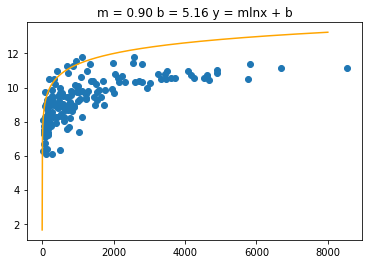

In [12]:
yb,paramb = (np.histogram(lista_b,normed=True))
paramb=paramb[1:]

b = paramb[yb==max(yb)]

ym,paramm = (np.histogram(lista_m,normed=True))
paramm=paramm[1:]
m = paramm[ym==max(ym)]

print(m,b)

plt.scatter(data.Health_expenditure_per_capita_PPP,data.Years_Lived_With_Disability)
xs = np.linspace(0.02001,8000,1000)
ys = model2(xs,m,b)
plt.title("m = {:.2f} b = {:.2f} y = mlnx + b".format(m[0],b[0]))
plt.plot(xs,ys,c='orange')
# plt.ylim(4,13)
plt.savefig('modelo2.pdf')

(array([1.819e+03, 2.615e+03, 3.739e+03, 4.358e+03, 4.826e+03, 5.217e+03,
        5.599e+03, 5.810e+03, 6.249e+03, 6.539e+03, 7.131e+03, 7.558e+03,
        7.961e+03, 8.295e+03, 8.273e+03, 8.239e+03, 7.776e+03, 7.596e+03,
        7.323e+03, 7.213e+03, 7.321e+03, 7.452e+03, 7.426e+03, 7.211e+03,
        7.001e+03, 6.737e+03, 6.418e+03, 6.048e+03, 5.412e+03, 4.599e+03,
        3.712e+03, 2.752e+03, 1.693e+03, 1.041e+03, 5.210e+02, 2.650e+02,
        1.500e+02, 6.600e+01, 3.400e+01, 5.000e+00]),
 array([9.69047431e-05, 2.66825108e-01, 5.33553312e-01, 8.00281515e-01,
        1.06700972e+00, 1.33373792e+00, 1.60046613e+00, 1.86719433e+00,
        2.13392253e+00, 2.40065074e+00, 2.66737894e+00, 2.93410714e+00,
        3.20083535e+00, 3.46756355e+00, 3.73429175e+00, 4.00101996e+00,
        4.26774816e+00, 4.53447637e+00, 4.80120457e+00, 5.06793277e+00,
        5.33466098e+00, 5.60138918e+00, 5.86811738e+00, 6.13484559e+00,
        6.40157379e+00, 6.66830199e+00, 6.93503020e+00, 7.20175840e+00

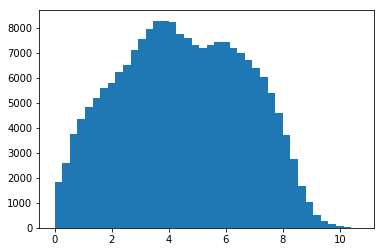

In [14]:
plt.hist(lista_b,bins=40)

In [19]:

def model3(x,a,b,c):
    return a*np.log(x-b) + c

def loglikelihood(x_obs, y_obs, m, b,c):
    ymodel = model3(x_obs,m,b,c)
    gamm = ymodel*np.exp(-ymodel/y_obs)/(y_obs**2)
    return np.sum(np.log(gamm))

def logprior(m, b,c):
    p = -np.inf
    
    m_min = 0.1
    m_max = 2
    b_min = -4
    b_max = 12
    c_min = -10
    c_max = 10
    
    if m < m_max and m >m_min and b >b_min and b<b_max and c<c_max and c>c_min:
        p = np.log(1/((b_max-b_min)*(m_max-m_min)*(c_max-c_min)))
    return p

#     if m < 2 and m >0.1 and b >0 and b<3:
#         p = 0.0
#     return p


In [21]:
N = 50000
lista_m = [np.random.random()]
lista_b = [np.random.random()]
lista_c = [np.random.random()]
logposterior = [loglikelihood(x_obs, y_obs,lista_m[0], lista_b[0],lista_c[0]) + logprior(lista_m[0], lista_b[0],lista_c[0])]

sigma_delta_m = 0.01
sigma_delta_b = 0.5
sigma_delta_c = 0.5

for i in range(1,N):
    propuesta_m  = lista_m[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_m)
    propuesta_b  = lista_b[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b)
    propuesta_c  = lista_c[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_c)
    
    
#     while(propuesta_m<0 or propuesta_b<0):
#         propuesta_m  = lista_m[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_m)
#         propuesta_b  = lista_b[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b)

    logposterior_viejo = loglikelihood(x_obs, y_obs,  lista_m[i-1], lista_b[i-1],lista_c[i-1]) + logprior(lista_m[i-1], lista_b[i-1],lista_c[i-1])
    logposterior_nuevo = loglikelihood(x_obs, y_obs,  propuesta_m, propuesta_b,propuesta_c) + logprior(propuesta_m, propuesta_b,propuesta_c)

    r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
    alpha = np.random.random()
    if(alpha<r):
        lista_m.append(propuesta_m)
        lista_b.append(propuesta_b)
        lista_c.append(propuesta_c)
        logposterior.append(logposterior_nuevo)
    else:
        lista_m.append(lista_m[i-1])
        lista_b.append(lista_b[i-1])
        lista_c.append(lista_c[i-1])
        logposterior.append(logposterior_viejo)
lista_m = np.array(lista_m)
lista_b = np.array(lista_b)
lista_c = np.array(lista_c)
logposterior = np.array(logposterior)

/home/mauro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


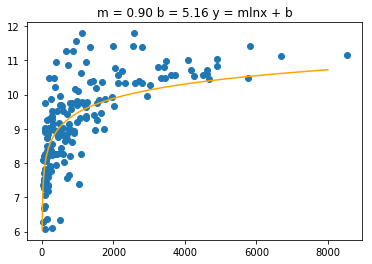

In [22]:
plt.scatter(data.Health_expenditure_per_capita_PPP,data.Years_Lived_With_Disability)
xs = np.linspace(0.02001,8000,1000)
ys = model3(xs,np.mean(lista_m),np.mean(lista_b),np.mean(lista_c))
plt.title("m = {:.2f} b = {:.2f} y = mlnx + b".format(m[0],b[0]))
plt.plot(xs,ys,c='orange')

## Para M1

In [26]:
m_min = 0
m_max = 1E-2
b_min = 0
b_max = 20

N=1000

ms = np.random.uniform(m_min,m_max,N)
bs = np.random.uniform(b_min,b_max,N)
def model(x,m,b):
    return m*x+b
def likelihood(x_obs, y_obs, m, b):
    ymodel = model(x_obs,m,b)
    gamm = ymodel*np.exp(-ymodel/y_obs)/(y_obs**2)
    return np.sum(gamm)

M1 = 0
for n in range(N):
    M1 += likelihood(x_obs,y_obs,ms[n],bs[n])
M1 /= N
M1


5.524185307964665

## Para M2

In [33]:
def model2(x,a,b):
    return a*np.log(x) + b
def likelihood(x_obs, y_obs, m, b):
    ymodel = model2(x_obs,m,b)
    gamm = ymodel*np.exp(-ymodel/y_obs)/(y_obs**2)
    return np.sum(gamm)


m_min = 0.1
m_max = 2
b_min = -4
b_max = 12

N=1000

ms = np.random.uniform(m_min,m_max,N)
bs = np.random.uniform(b_min,b_max,N)


M2 = 0
for n in range(N):
    M2 += likelihood(x_obs,y_obs,ms[n],bs[n])
M2 /= N
M2


5.784598344869585

## Para M3

In [34]:

def model3(x,a,b,c):
    return a*np.log(x-b) + c

def likelihood(x_obs, y_obs, m, b,c):
    ymodel = model3(x_obs,m,b,c)
    gamm = ymodel*np.exp(-ymodel/y_obs)/(y_obs**2)
    return np.sum((gamm))
    
m_min = 0.1
m_max = 2
b_min = -4
b_max = 12
c_min = -10
c_max = 10


N=1000

ms = np.random.uniform(m_min,m_max,N)
bs = np.random.uniform(b_min,b_max,N)
cs = np.random.uniform(c_min,c_max,N)
M3 = 0
for n in range(N):
    M3 += likelihood(x_obs,y_obs,ms[n],bs[n],cs[n])
M3 /= N
M3

    

1.7927794721562518

In [35]:
F12 = M1/M2
F13 = M1/M3
F23 = M2/M3
print(F12,F13,F23)

0.9549816562223575 3.0813523881554117 3.2266089804744382
